In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

/home/nandini/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import matplotlib.pyplot as plt

In [3]:
import IPython.display as ipd
import librosa

song = "/mnt/c/Users/preet/Desktop/Projects/SER/euphoric.wav"

# Load the audio file into a NumPy array
audio_data, sample_rate = librosa.load(song)

# Play the audio file
ipd.Audio(audio_data, rate=sample_rate)

In [4]:
data,sample_rate=librosa.load(song)
data

array([2.12761952e-05, 3.29026443e-05, 2.90631797e-05, ...,
       1.04627354e-04, 1.55209113e-04, 1.37963143e-04], dtype=float32)

In [5]:
sample_rate

22050

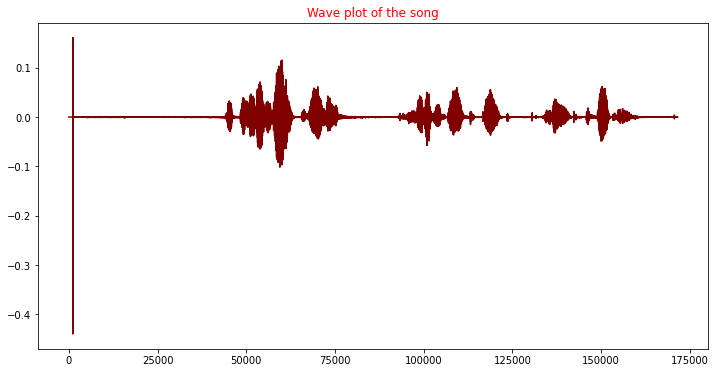

In [6]:
#librosa.display.waveplot(data,sr=sample_rate)
plt.figure(figsize=(12,6))
plt.plot(data,c="maroon")
plt.title("Wave plot of the song",c="r")
plt.show()

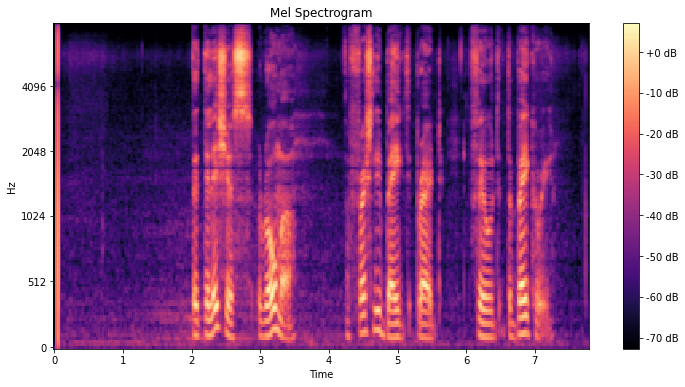

In [7]:
plt.figure(figsize=(12,6))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [8]:
import os
import librosa

# Get the absolute path of the audio file.
audio_file_path = os.path.abspath('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')

# Load the audio data.

audio_data, sample_rate = librosa.load(audio_file_path)

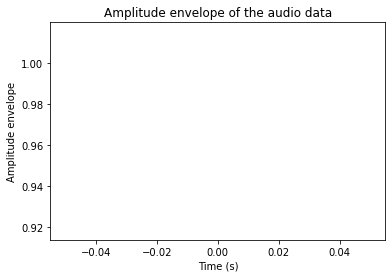

In [9]:
import numpy as np

def get_amplitude_envelope(audio_data):
  """Calculates the amplitude envelope feature of an audio signal.

  Args:
    audio_data: A NumPy array containing the audio signal.

  Returns:
    A NumPy array containing the amplitude envelope feature.
  """

  # Calculate the absolute value of the audio data.
  abs_audio_data = np.abs(audio_data)

  # Apply a smoothing filter to the absolute value data.
  smoothed_abs_audio_data = my_smoothing_filter(abs_audio_data)

  # Take the maximum value of the smoothed data for all frames.
  amplitude_envelope = np.max(smoothed_abs_audio_data)

  return amplitude_envelope

def my_smoothing_filter(audio_data):
  """Custom smoothing filter.

  Args:
    audio_data: A NumPy array containing the audio data.

  Returns:
    A NumPy array containing the smoothed audio data.
  """

  # Apply a convolution with a Hann window to smooth the audio data.
  smoothed_audio_data = np.convolve(audio_data, np.ones(100) / 100, mode='same')

  return smoothed_audio_data

# Load the audio data.
audio_data, sample_rate = librosa.load('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')

# Get the amplitude envelope feature of the audio data.
amplitude_envelope = get_amplitude_envelope(audio_data)

# Plot the amplitude envelope feature.
import matplotlib.pyplot as plt

plt.plot(amplitude_envelope)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude envelope')
plt.title('Amplitude envelope of the audio data')
plt.show()

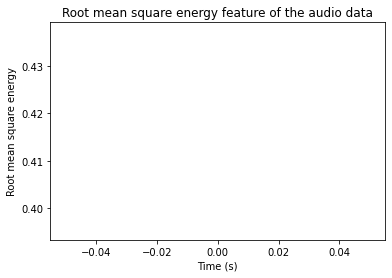

In [10]:
import numpy as np

def get_rmse_feature(audio_data):
  """Calculates the root mean square energy feature of an audio signal.

  Args:
    audio_data: A NumPy array containing the audio signal.

  Returns:
    A NumPy array containing the root mean square energy feature.
  """

  # Calculate the square of the audio data.
  squared_audio_data = audio_data ** 2

  # Calculate the mean of the squared audio data for all frames.
  mean_squared_audio_data = np.mean(squared_audio_data)

  # Take the square root of the mean squared audio data.
  rmse_feature = np.sqrt(mean_squared_audio_data)

  return rmse_feature

# Load the audio data.
audio_data, sample_rate = librosa.load('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')

# Get the root mean square energy feature of the audio data.
rmse_feature = get_rmse_feature(audio_data)

# Plot the root mean square energy feature.
import matplotlib.pyplot as plt

plt.plot(rmse_feature)
plt.xlabel('Time (s)')
plt.ylabel('Root mean square energy')
plt.title('Root mean square energy feature of the audio data')
plt.show()

In [11]:
import numpy as np
import librosa

def get_features(audio_data, sample_rate):

    # Extract the features
    mean_mfcc_features, std_mfcc_features, pitch, tempo = librosa.feature.mfcc(
        audio_data, sr=sample_rate, n_mfcc=13)

    # Return the features
    return mean_mfcc_features, std_mfcc_features, pitch, tempo

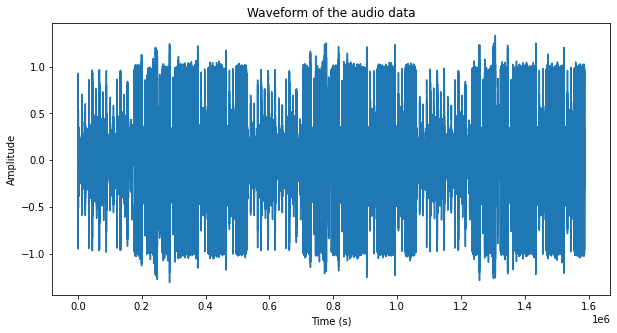

In [12]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the audio data
audio_data, sample_rate = librosa.load('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')

# Display the waveform of the audio data
plt.figure(figsize=(10, 5))
plt.plot(audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of the audio data')
plt.savefig('waveform.png')
plt.show()

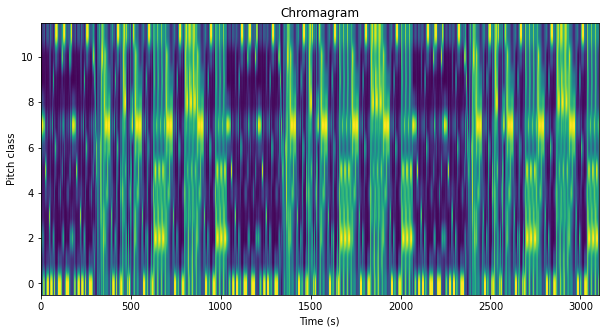

In [13]:
import librosa
import matplotlib.pyplot as plt

def get_chromagram(audio_data, sample_rate):
    chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)
    return chromagram

audio_data, sample_rate = librosa.load('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')
chromagram = get_chromagram(audio_data, sample_rate)

plt.figure(figsize=(10, 5))
plt.imshow(chromagram, origin='lower', aspect='auto')
plt.xlabel('Time (s)')
plt.ylabel('Pitch class')
plt.title('Chromagram')
plt.savefig('chromagram.png')
plt.show()

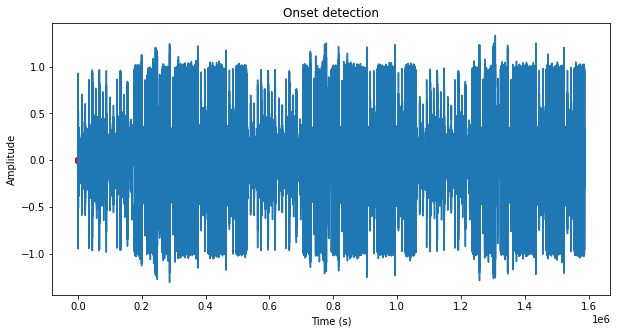

In [14]:
import librosa
import matplotlib.pyplot as plt

def get_onsets(audio_data, sample_rate):
    onsets = librosa.onset.onset_detect(y=audio_data, sr=sample_rate)
    return onsets

audio_data, sample_rate = librosa.load('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')
onsets = get_onsets(audio_data, sample_rate)

plt.figure(figsize=(10, 5))
plt.plot(audio_data)
plt.scatter(onsets, np.zeros_like(onsets), marker='o', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Onset detection')
plt.savefig('onset_detection.png')
plt.show()

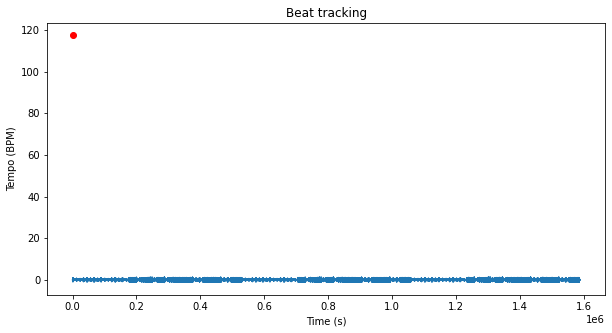

In [15]:
import librosa
import matplotlib.pyplot as plt

def get_tempo(audio_data, sample_rate):
    tempo = librosa.beat.tempo(y=audio_data, sr=sample_rate)
    return tempo

audio_data, sample_rate = librosa.load('/mnt/c/Users/preet/Desktop/Projects/SER/y2mate.com - The Banjo Beat Pt 1.mp3')
tempo = get_tempo(audio_data, sample_rate)

plt.figure(figsize=(10, 5))
plt.plot(audio_data)
plt.scatter(np.linspace(0, len(audio_data) / sample_rate, len(tempo)), tempo, marker='o', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Tempo (BPM)')
plt.title('Beat tracking')
plt.savefig('beat_tracking.png')
plt.show()

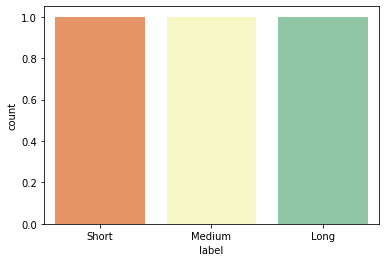

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

rhythm_histogram = np.array([10, 20, 30, 40, 50])
labels = ["Short", "Medium", "Long"]

# Create a dictionary to map the rhythm histogram values to labels
data = dict(zip(labels, rhythm_histogram))

# Add the `label` variable to the dictionary
data["label"] = labels

# Plot the countplot
sns.countplot(x="label", hue="label", data=data, palette="Spectral")

# Display the plot
plt.show()